Sentinel-3数据查看

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import numpy as np
from pyrsimg import readTiff, imgShow


In [2]:
## s3 data
path_s3l2 = 'data/radar/S3A_SR_2_LAN____20230728T030708_20230728T035736_20230823T063435_3028_101_289______PS1_O_NT_004.SEN3/enhanced_measurement.nc'
## remote sensing data
path_rsimg = 'data/rsimg/s2_dianchi_20200511_wgs84_resam50m.tif'


In [ ]:
## 1. s3l2 altimetry data
s3l2 = nc.Dataset(path_s3l2)   ##
## 2. remote sensing image
rsimg = readTiff(path_rsimg)


In [8]:
print('number of variables: ', len(s3l2.variables.keys()))
list(s3l2.variables.keys())


number of variables:  376


['time_01',
 'time_20_ku',
 'time_20_c',
 'echo_sample_ind',
 'UTC_day_01',
 'UTC_sec_01',
 'UTC_day_20_ku',
 'UTC_sec_20_ku',
 'UTC_day_20_c',
 'UTC_sec_20_c',
 'UTC_time_1hz_20_ku',
 'UTC_time_1hz_20_c',
 'lat_01',
 'lon_01',
 'lat_20_ku',
 'lon_20_ku',
 'lat_20_c',
 'lon_20_c',
 'lat_cor_20_ku',
 'lon_cor_20_ku',
 'lat_cor_20_c',
 'lon_cor_20_c',
 'surf_type_01',
 'surf_type_20_ku',
 'surf_type_20_c',
 'surf_class_01',
 'surf_class_20_ku',
 'surf_class_20_c',
 'rad_surf_type_01',
 'angle_coast_01',
 'angle_coast_20_ku',
 'angle_coast_20_c',
 'dist_coast_01',
 'dist_coast_20_ku',
 'dist_coast_20_c',
 'alt_01',
 'alt_20_ku',
 'alt_20_c',
 'orb_alt_rate_01',
 'orb_alt_rate_20_ku',
 'orb_alt_rate_20_c',
 'tracker_range_20_ku',
 'tracker_range_20_c',
 'tracker_range_20_plrm_ku',
 'h0_nav_dem_20_ku',
 'agc_01_ku',
 'agc_01_c',
 'agc_01_plrm_ku',
 'agc_20_ku',
 'agc_20_c',
 'agc_20_plrm_ku',
 'agc_numval_01_ku',
 'agc_numval_01_c',
 'agc_numval_01_plrm_ku',
 'agc_rms_01_ku',
 'agc_rms_01_c

In [12]:
lat_20_ku = s3l2['lat_cor_20_ku'][:]
lon_20_ku = s3l2['lon_cor_20_ku'][:]
time_20_ku = s3l2['time_20_ku'][:]
waveform_20_ku = s3l2['waveform_20_ku'][:]
# time_20_ku = second_to_dyr(time_20_ku)   ### seconds to year.
print(time_20_ku.shape)
print(waveform_20_ku.shape)



(40427,)
(40427, 128)


cycle_101-pass_578


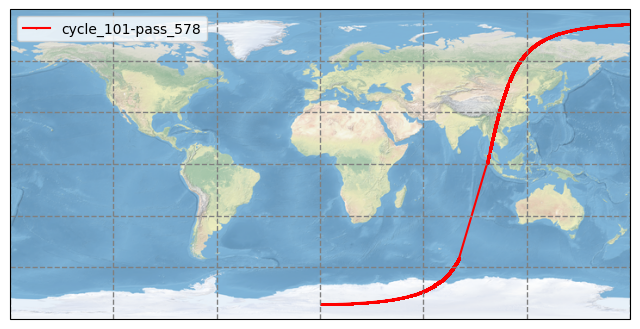

In [ ]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(8,8))  ## 定义画布
ax = fig.add_subplot(111, projection=proj);   ## 定义画框
ax.stock_img()    ## 加载地图
orbit = 'cycle_'+str(s3l2.cycle_number)+'-pass_'+str(s3l2.pass_number)
print(orbit)
ax.plot(lon_20_ku, lat_20_ku, marker='.', markersize=1,
                                label=orbit, color='red')
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()


Text(0.5, 1.0, 'sentinel-3 data')

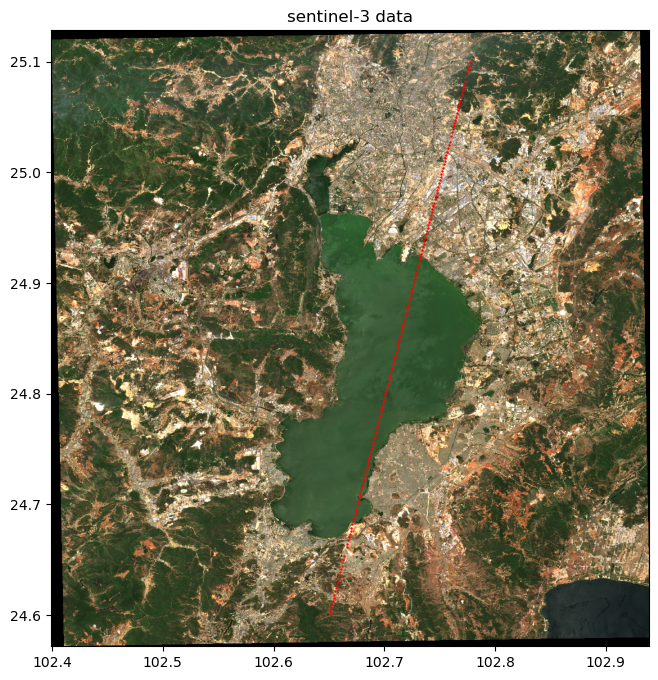

In [25]:
ids = np.where((lat_20_ku[:]>24.6) & (lat_20_ku[:]<25.1))  ### the range of dianchi
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1,1,1)
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax)
plt.scatter(x=lon_20_ku[ids], y=lat_20_ku[ids], s=0.5, color='red')  ## altimetry data
plt.title('sentinel-3 data')



(1854.5, 1855.6)

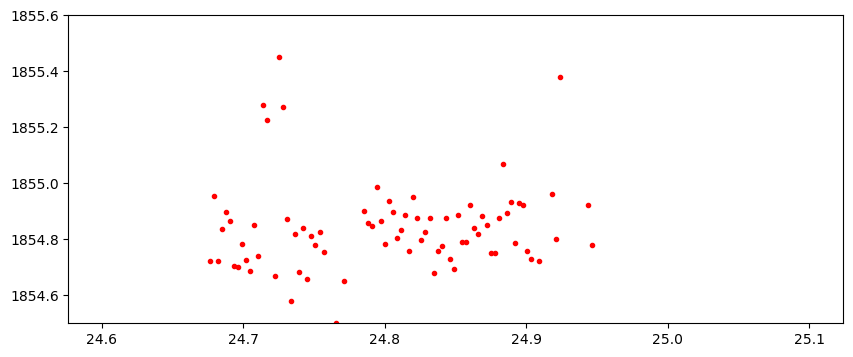

In [31]:
## 3.3 ocog retracker(official given)
h_cor_ocog = s3l2['elevation_ocog_20_ku'][:]
plt.figure(figsize=(10,4))
plt.plot(lat_20_ku[ids], h_cor_ocog[ids], 'r.')
plt.ylim(1854.5, 1855.6)


In [49]:
ids = np.where((lat_20_ku[:]>24.8) & (lat_20_ku[:]<24.85))[0]  ### the range of dianchi
id = ids[1]
wf_sar = s3l2['waveform_20_ku'][:][id]
wf_lrm = s3l2['waveform_20_plrm_ku'][:][id]
print(wf_sar.shape)
print(wf_lrm.shape)



(128,)
(128,)


Text(0.5, 1.0, 'lrm waveform')

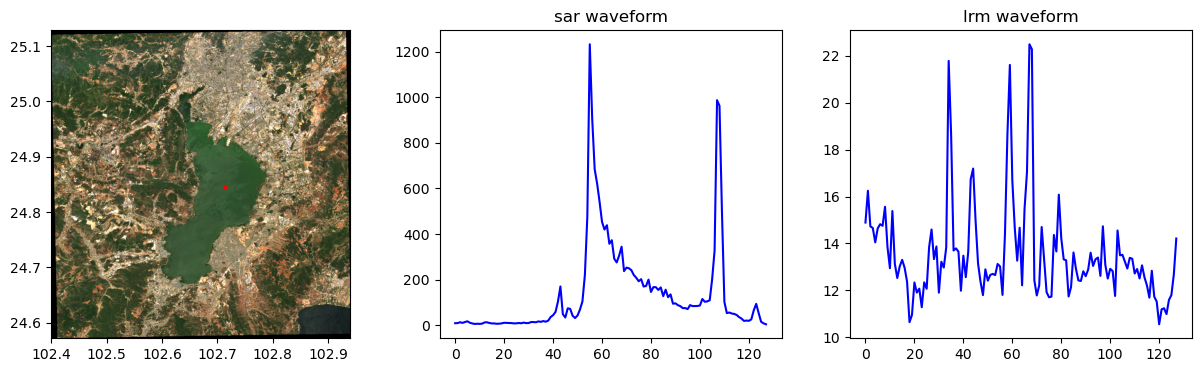

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax[0])
ax[0].scatter(x=lon_20_ku[id], y=lat_20_ku[id], s=2.5, color='red')  ## altimetry data
ax[1].plot(wf_sar, color='blue')
ax[1].set_title('sar waveform')
ax[2].plot(wf_lrm, color='blue')
ax[2].set_title('lrm waveform')
